In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("Dataset.csv")

In [3]:
df

,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,...,France,Germany,Spain,Female,Male,Mem__no__Products,Cred_Bal_Sal,Bal_sal,Tenure_Age,Age_Tenure_product
0,2023,668.0,33.0,3.0,0.00,2.0,1,0,181449.97,0,...,1,0,0,0,1,0.0,0.000000,0.000000,0.090909,99.0
1,2024,627.0,33.0,1.0,0.00,2.0,1,1,49503.50,0,...,1,0,0,0,1,2.0,0.000000,0.000000,0.030303,33.0
2,1236,678.0,40.0,10.0,0.00,2.0,1,0,184866.69,0,...,1,0,0,0,1,0.0,0.000000,0.000000,0.250000,400.0
3,1362,581.0,34.0,2.0,148882.54,1.0,1,1,84560.88,0,...,1,0,0,0,1,1.0,1022.940581,1.760655,0.058824,68.0
4,491,716.0,33.0,5.0,0.00,2.0,1,1,15068.83,0,...,0,0,1,0,1,2.0,0.000000,0.000000,0.151515,165.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175023,2226,644.0,28.0,7.0,155060.41,1.0,1,0,29179.52,0,...,1,0,0,0,1,0.0,3422.225727,5.314015,0.250000,196.0
175024,2846,800.0,29.0,2.0,0.00,2.0,0,0,167773.55,0,...,1,0,0,1,0,0.0,0.000000,0.000000,0.068966,58.0
175025,1999,771.0,39.0,5.0,0.00,2.0,1,0,96270.64,0,...,1,0,0,0,1,0.0,0.000000,0.000000,0.128205,195.0
175026,1336,516.0,35.0,10.0,57369.61,1.0,1,1,101699.77,0,...,1,0,0,0,1,1.0,291.079505,0.564108,0.285714,350.0


In [4]:
df.columns

Index(['Surname', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Surname_tfidf_0', 'Surname_tfidf_1', 'Surname_tfidf_2',
       'Surname_tfidf_3', 'Surname_tfidf_4', 'France', 'Germany', 'Spain',
       'Female', 'Male', 'Mem__no__Products', 'Cred_Bal_Sal', 'Bal_sal',
       'Tenure_Age', 'Age_Tenure_product'],
      dtype='object')

**Techniques to pare down large data with too many variables are-**

    1) by finding correlation
    2) by prioritizing features that are likely to have a significant impact on the target variable
    3) by selecting features according to domain knowledge
    4) by reducing dimensionality of dataset

# By finding Correlation

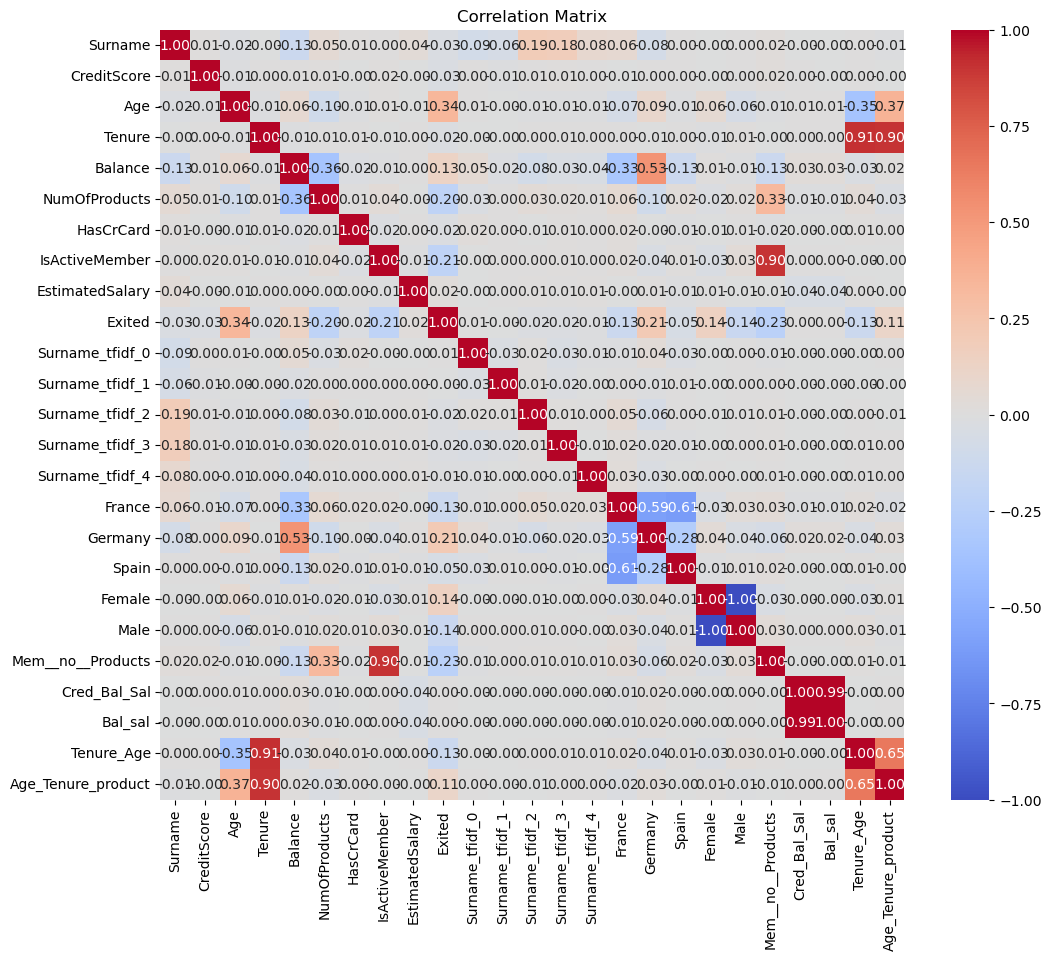

In [5]:
import seaborn as sns

df = df.dropna()

numerical_features = df.select_dtypes(include=['int64', 'float64'])

correlation_matrix = numerical_features.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# By prioritizing features that are likely to have a significant impact on the target variable

In [6]:
from sklearn.ensemble import RandomForestClassifier

X = df.drop(['Exited'], axis=1)
y = df['Exited']

rf_model = RandomForestClassifier()

rf_model.fit(X, y)

feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})

feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

print(feature_importances)

               Feature  Importance
2                  Age    0.160578
5        NumOfProducts    0.113562
1          CreditScore    0.067787
8      EstimatedSalary    0.066273
23  Age_Tenure_product    0.058317
0              Surname    0.058220
22          Tenure_Age    0.056116
19   Mem__no__Products    0.046972
4              Balance    0.045006
20        Cred_Bal_Sal    0.040378
21             Bal_sal    0.039280
12     Surname_tfidf_3    0.029701
13     Surname_tfidf_4    0.028807
10     Surname_tfidf_1    0.025736
11     Surname_tfidf_2    0.025711
3               Tenure    0.025452
7       IsActiveMember    0.023453
9      Surname_tfidf_0    0.021878
15             Germany    0.021409
6            HasCrCard    0.010961
17              Female    0.010019
14              France    0.009711
18                Male    0.008144
16               Spain    0.006527


# By selecting features according to domain knowlege

In [7]:
X = df.drop(['Exited'], axis=1)
y = df['Exited']

important_features = [
    'CreditScore',
    'Age',
    'Balance',
    'NumOfProducts',
    'HasCrCard',
    'IsActiveMember',
    'EstimatedSalary',
    'France',
    'Germany',
    'Spain',
    'Female',
    'Male',
    'Cred_Bal_Sal'
]

X_domain_knowledge = X[important_features]

In [11]:
X_domain_knowledge

,CreditScore,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,Female,Male,Cred_Bal_Sal
0,668.0,33.0,0.00,2.0,1,0,181449.97,1,0,0,0,1,0.000000
1,627.0,33.0,0.00,2.0,1,1,49503.50,1,0,0,0,1,0.000000
2,678.0,40.0,0.00,2.0,1,0,184866.69,1,0,0,0,1,0.000000
3,581.0,34.0,148882.54,1.0,1,1,84560.88,1,0,0,0,1,1022.940581
4,716.0,33.0,0.00,2.0,1,1,15068.83,0,0,1,0,1,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
175023,644.0,28.0,155060.41,1.0,1,0,29179.52,1,0,0,0,1,3422.225727
175024,800.0,29.0,0.00,2.0,0,0,167773.55,1,0,0,1,0,0.000000
175025,771.0,39.0,0.00,2.0,1,0,96270.64,1,0,0,0,1,0.000000
175026,516.0,35.0,57369.61,1.0,1,1,101699.77,1,0,0,0,1,291.079505


# By reducing dimensionality of dataset

In [8]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = df.drop(['Exited'], axis=1)
y = df['Exited']

scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

num_components = 10  
pca = PCA(n_components=num_components)

X_pca = pca.fit_transform(X_standardized)

columns = [f"PC{i+1}" for i in range(num_components)]
X_pca_df = pd.DataFrame(data=X_pca, columns=columns)

X_pca_df['Exited'] = y

In [9]:
X_pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Exited
0,-1.078380,-1.208526,0.133952,-0.797705,2.017796,0.071523,0.068023,-0.475517,-0.017307,0.566616,0
1,-2.194534,-2.687994,0.652495,-0.213270,-0.400615,-0.544313,-0.152748,-0.141323,-0.026838,-0.578327,0
2,2.887658,-0.720613,0.091815,-0.771780,1.770322,-0.218456,0.004132,0.516021,0.028201,0.632850,0
3,-1.732857,-0.564194,0.764943,-1.029210,-0.138986,-1.407154,-0.305054,-0.128113,-0.155624,-0.153841,0
4,0.064479,-1.560508,0.943171,-0.698020,-1.792228,1.974543,-1.325825,0.627351,0.319372,-1.158601,0
...,...,...,...,...,...,...,...,...,...,...,...
175023,1.195131,0.343765,0.568807,-1.308832,1.770551,-0.685817,-0.389447,-1.129868,-0.036704,-0.858338,0
175024,-1.740410,-0.495935,-1.207097,1.549161,1.777817,0.366084,0.224502,-1.303300,-0.035554,0.287503,0
175025,0.045582,-1.037931,0.205230,-0.719472,1.882460,-0.028536,0.293802,0.189485,0.238495,-0.502080,0
175026,2.850368,-0.927868,0.556533,-0.733601,0.089044,-1.107508,-0.358298,0.158175,-0.280147,0.151629,0
